# Mapping migration

Introduction to vector data operations

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [13]:
%store -r

In [1]:
#Import my libraries
import os
import pathlib
import csv  

import pandas as pd
import geopandas as gpd



## STEP 1: Create a directory for your data

For this challenge, you will need to download some data to the computer
you’re working on. We suggest using the `earthpy` library we develop to
manage your downloads, since it encapsulates many best practices as far
as:

1.  Where to store your data
2.  Dealing with archived data like .zip files
3.  Avoiding version control problems
4.  Making sure your code works cross-platform
5.  Avoiding duplicate downloads

If you’re working on one of our assignments through GitHub Classroom, it
also lets us build in some handy defaults so that you can see your data
files while you work.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create a project folder</div></div><div class="callout-body-container callout-body"><p>The code below will help you get started with making a project
directory</p>
<ol type="1">
<li>Replace <code>project_title</code> with the actual project title,
Veery Migration 2023</li>
<li>Replace <code>'your-project-directory-name-here'</code> with a
<strong>descriptive</strong> name</li>
<li>The code should have printed out the path to your data files. Check
that your data directory exists and has data in it using the terminal or
your Finder/File Explorer.</li>
</ol></div></div>

> **File structure**
>
> These days, a lot of people find your file by searching for them or
> selecting from a `Bookmarks` or `Recents` list. Even if you don’t use
> it, your computer also keeps files in a **tree** structure of folders.
> Put another way, you can organize and find files by travelling along a
> unique **path**, e.g. `My Drive` \> `Documents` \>
> `My awesome project` \> `A project file` where each subsequent folder
> is **inside** the previous one. This is convenient because all the
> files for a project can be in the same place, and both people and
> computers can rapidly locate files they want, provided they remember
> the path.
>
> You may notice that when Python prints out a file path like this, the
> folder names are **separated** by a `/` or `\` (depending on your
> operating system). This character is called the **file separator**,
> and it tells you that the next piece of the path is **inside** the
> previous one.

In [2]:
# Create data directory
data_dir = os.path.join(
    #home directory
    pathlib.Path.home(),
    #earth data analytics directory
    'earth-analytics',
    'data',
    #project directory
    'migration',
)
print(data_dir)

os.makedirs(data_dir, exist_ok=True)
# Download sample data
#data_dir.get_data()

# Display the project directory
#project.project_dir

/Users/gml/earth-analytics/data/migration


## STEP 2: Define your study area – the ecoregions of North America

Your sample data package included a Shapefile of global **ecoregions**.
You should be able to see changes in the number of observations of Veery
thrush in each ecoregion throughout the year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-info"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div></div><div class="callout-body-container callout-body"><p>You don’t have to use ecoregions to group species observations – you
could choose to use political boundaries like countries or states, other
natural boundaries like watersheds, or even uniform hexagonal areas as
is common in conservation work. We chose ecoregions because we expect
the suitability for a species at a particular time of year to be
relatively consistent across the region.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>The ecoregion data will be available as a <strong>shapefile</strong>.
Learn more about shapefiles and vector data in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/">Introduction
to Spatial Vector Data File Formats in Open Source Python</a></p></div></div>

### Load the ecoregions into Python

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load ecoregions into Python</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Replace <code>a_path</code> with the path your created for your
ecoregions file.</li>
<li>Make a quick plot with <code>.plot()</code> to make sure the
download worked.</li>
</ol></div></div>

In [3]:
eco_url = (
    "https://storage.googleapis.com/"
    "teow2016/Ecoregions2017.zip"
)

# Open up the ecoregions boundaries
eco_dir = os.path.join(data_dir, 'resolve_ecoregions')
#make directory
os.makedirs(eco_dir, exist_ok=True)



#join ecoregions shapefile
eco_path = os.path.join(eco_dir, 'ecoregions.shp')

# Only download and extract if not already saved
if not os.path.exists(eco_path):
    gdf = gpd.read_file(f"zip+{eco_url}")  # read directly from zip URL
    gdf.to_file(eco_path)
    print("Downloaded and saved shapefile to:", eco_path)
else:
    gdf = gpd.read_file(eco_path)
    print("Loaded existing shapefile from:", eco_path)

Loaded existing shapefile from: /Users/gml/earth-analytics/data/migration/resolve_ecoregions/ecoregions.shp


<Axes: >

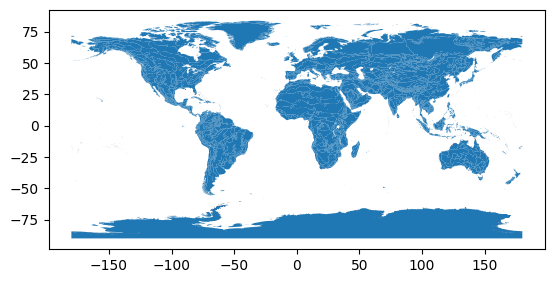

In [4]:
gdf =(
    gpd.read_file(eco_path)
    [['OBJECTID', 'ECO_NAME', 'SHAPE_AREA', 'geometry']]
    .rename(columns={
        'OBJECTID': 'ecoregion_id',
        'ECO_NAME': 'name',
        'SHAPE_AREA': 'area'
    })
    .set_index('ecoregion_id')
)


gdf.plot()


In [5]:
gdf.head()

,name,area,geometry
ecoregion_id,,,
1.0,Adelie Land tundra,0.038948,"MULTIPOLYGON (((158.7141 -69.60657, 158.71264 ..."
2.0,Admiralty Islands lowland rain forests,0.170599,"MULTIPOLYGON (((147.28819 -2.57589, 147.2715 -..."
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35..."
4.0,Afghan Mountains semi-desert,1.355536,"MULTIPOLYGON (((65.48655 34.71401, 65.52872 34..."
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673..."


## STEP 3: Load species observation data

For this challenge, you will use a database called the [Global
Biodiversity Information Facility (GBIF)](https://www.gbif.org/). GBIF
is compiled from species observation data all over the world, and
includes everything from museum specimens to photos taken by citizen
scientists in their backyards. We’ve compiled some sample data in the
same format that you will get from GBIF.

Let’s start by looking at a little of the raw data.

In [6]:
gbif_path = '/Users/gml/earth-analytics/data/species_migration_portfolio/crane.csv'

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load GBIF data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Look at the beginning of the file you downloaded using the code
below. What do you think the <strong>delimiter</strong> is?</li>
<li>Run the following code cell. What happens?</li>
<li>Uncomment and modify the parameters of <code>pd.read_csv()</code>
below until your data loads successfully and you have only the columns
you want.</li>
</ol></div></div>

You can use the following code to look at the beginning of your file:

In [7]:
!head -n 2 $gbif_path 

gbifID	datasetKey	occurrenceID	kingdom	phylum	class	order	family	genus	species	infraspecificEpithet	taxonRank	scientificName	verbatimScientificName	verbatimScientificNameAuthorship	countryCode	locality	stateProvince	occurrenceStatus	individualCount	publishingOrgKey	decimalLatitude	decimalLongitude	coordinateUncertaintyInMeters	coordinatePrecision	elevation	elevationAccuracy	depth	depthAccuracy	eventDate	day	month	year	taxonKey	speciesKey	basisOfRecord	institutionCode	collectionCode	catalogNumber	recordNumber	identifiedBy	dateIdentified	license	rightsHolder	recordedBy	typeStatus	establishmentMeans	lastInterpreted	mediaType	issue
4979003966	df12ca07-f133-4550-ab3b-fde13f0e76ba	http://tun.fi/JX.1774030#3	Animalia	Chordata	Aves	Gruiformes	Gruidae	Grus	Grus canadensis		SPECIES	Antigone canadensis (Linnaeus, 1758)	Antigone canadensis (Linnaeus, 1758)		FI		Pirkanmaa	PRESENT	53	04fd2e13-6881-4e5c-9dd1-8fdd9ab993c1	62.159518	23.604442	1.0						2024-10-07T07:36Z	7	10	2024	9036008	2474953	HUMAN_O

In [8]:
gbif_df = pd.read_csv(
    gbif_path,
    sep="\t",                # tab-separated
    engine="c",              # default engine (supports low_memory)
    low_memory=False,        # keeps column types consistent
    index_col='gbifID',
    quoting=csv.QUOTE_NONE,  # prevents pandas from misreading quotes
    na_values=["", "NA", "NaN", "\\N"],  # treat blanks as NaN
    parse_dates=["eventDate", "lastInterpreted"],  # optional
)
gbif_df.head()


,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
gbifID,,,,,,,,,,,,,,,,,,,,,
4979003966,df12ca07-f133-4550-ab3b-fde13f0e76ba,http://tun.fi/JX.1774030#3,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,Larissa Heinämäki,NaN,NaN,2025-10-28T05:32:36.637Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...
4606410520,38b4c89f-584c-41bb-bd8f-cd1def33e92f,urn:lsid:artportalen.se:sighting:115688793,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC0_1_0,Magnus Blom,Magnus Blom,NaN,NaN,2025-10-25T15:54:07.783Z,NaN,NaN
5427101912,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS2060596849,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,obsr1814937,NaN,NaN,2025-10-08T14:29:54.530Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...
5316623519,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS2627005685,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,obsr990783,NaN,NaN,2025-10-08T14:29:54.530Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...
5384332270,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS2722234734,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,obsr1388014,NaN,NaN,2025-10-08T14:29:54.530Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...


### Convert the GBIF data to a GeoDataFrame

To plot the GBIF data, we need to convert it to a `GeoDataFrame` first.
This will make some special geospatial operations from `geopandas`
available, such as spatial joins and plotting.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert `DataFrame` to `GeoDataFrame`</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>your_dataframe</code> with the name of the
<code>DataFrame</code> you just got from GBIF</li>
<li>Replace <code>longitude_column_name</code> and
<code>latitude_column_name</code> with column names from your
`DataFrame</li>
<li>Run the code to get a <code>GeoDataFrame</code> of the GBIF
data.</li>
</ol></div></div>

In [9]:
gbif_df

,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
gbifID,,,,,,,,,,,,,,,,,,,,,
4979003966,df12ca07-f133-4550-ab3b-fde13f0e76ba,http://tun.fi/JX.1774030#3,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,Larissa Heinämäki,NaN,NaN,2025-10-28T05:32:36.637Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...
4606410520,38b4c89f-584c-41bb-bd8f-cd1def33e92f,urn:lsid:artportalen.se:sighting:115688793,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC0_1_0,Magnus Blom,Magnus Blom,NaN,NaN,2025-10-25T15:54:07.783Z,NaN,NaN
5427101912,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS2060596849,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,obsr1814937,NaN,NaN,2025-10-08T14:29:54.530Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...
5316623519,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS2627005685,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,obsr990783,NaN,NaN,2025-10-08T14:29:54.530Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...
5384332270,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS2722234734,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,NaN,NaN,CC_BY_4_0,NaN,obsr1388014,NaN,NaN,2025-10-08T14:29:54.530Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_CONCE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939487182,ba19fc1d-670c-426b-b99d-49f003792ac4,d9d3e54a-7322-11ef-94d3-96000110f1ee#15,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,Данилова Валерия,NaN,CC_BY_NC_4_0,NaN,Danilova Valeriya,NaN,NaN,2025-10-25T14:56:28.145Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
4951515493,ba19fc1d-670c-426b-b99d-49f003792ac4,e21f140e-821d-11ef-80bf-96000110f1ee#11,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,Данилова Валерия,NaN,CC_BY_NC_4_0,NaN,Danilova Valeriya,NaN,NaN,2025-10-25T14:55:54.360Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
4920943587,ba19fc1d-670c-426b-b99d-49f003792ac4,a81a43b2-5105-11ef-8b77-96000110f1ee#16,Animalia,Chordata,Aves,Gruiformes,Gruidae,Grus,Grus canadensis,NaN,...,Данилова Валерия,NaN,CC_BY_NC_4_0,NaN,Danilova Valeriya,NaN,NaN,2025-10-25T14:56:58.082Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...


In [10]:
gbif_df.decimalLongitude.min


<bound method Series.min of gbifID
4979003966     23.604442
4606410520     14.504320
5427101912    -81.532590
5316623519    -84.904090
5384332270   -123.185000
                 ...    
4939487182    177.033822
4951515493    177.057136
4920943587    177.674517
4910009348    177.684558
4910007931    177.053058
Name: decimalLongitude, Length: 332461, dtype: float64>

In [11]:
#had issues with values that weren't number, so had to drop those values




gbif_gdf = (
    gpd.GeoDataFrame(
        gbif_df, 
        geometry=gpd.points_from_xy(
            gbif_df.decimalLongitude, 
            gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['month','geometry']]
)
#gbif_gdf = pd.read_csv(gbif_path, index_col='gbifID')


# build GBIF GeoDataFrame from raw gbif_df
gbif_gdf = gpd.GeoDataFrame(
    gbif_df,
    geometry=gpd.points_from_xy(
        gbif_df.decimalLongitude,
        gbif_df.decimalLatitude
    ),
    crs="EPSG:4326"
)[['month', 'geometry']]

# force 'month' to numeric
gbif_gdf['month'] = pd.to_numeric(gbif_gdf['month'], errors='coerce')

# drop rows with NaN months
gbif_gdf = gbif_gdf.dropna(subset=['month'])

# make month integer (floor is fine, but astype(int) works since we dropped NaN)
gbif_gdf['month'] = gbif_gdf['month'].astype(int)

# keep only valid calendar months 1..12
gbif_gdf = gbif_gdf[gbif_gdf['month'].between(1, 12)]

# drop any rows with invalid / missing geometries
gbif_gdf = gbif_gdf[~gbif_gdf.geometry.is_empty & gbif_gdf.geometry.notna()].copy()

gbif_gdf




,month,geometry
gbifID,,
4979003966,10,POINT (23.60444 62.15952)
4606410520,4,POINT (14.50432 58.06042)
5427101912,4,POINT (-81.53259 27.83838)
5316623519,11,POINT (-84.90409 42.24873)
5384332270,12,POINT (-123.185 49.1)
...,...,...
4939487182,6,POINT (177.03382 62.5515)
4951515493,6,POINT (177.05714 62.57632)
4920943587,7,POINT (177.67452 64.69937)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="f1412915" class="cell" data-execution_count="14">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store ecoregions_gdf gbif_gdf</span></code></pre></div>
</div></div></div>

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [12]:
%store gdf gbif_gdf

Stored 'gdf' (GeoDataFrame)
Stored 'gbif_gdf' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!